# Credits

This is heavily influenced or copied from https://github.com/pytorch/tutorials 
and 02456 deep learning with Pytorch


# What is PyTorch?


It’s a Python based scientific computing package targeted at two sets of
audiences:
-  A replacement for numpy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed
https://www.youtube.com/playlist?list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG

### Director of AI at Tesla

![Andrei-Karpathy](https://www.dropbox.com/s/dt2vvxafq1owehy/andrei-karpathy.png?dl=1)

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/v5cngxo4mIg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Getting Started

In this notebook you will get a quick start on what pytorch is and how to use it.

## 1. Tensors

Tensors are similar to numpy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.

In [0]:
import torch

Construct a 5x3 matrix, uninitialized

In [3]:
x = torch.Tensor(5, 3)
print(x)

tensor([[9.8722e-37, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 1.8831e+28],
        [1.3733e-14, 6.4069e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [3.8016e-39, 2.1669e-04, 0.0000e+00]])


Construct a randomly initialized matrix

In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4357, 0.6150, 0.1306],
        [0.2886, 0.7342, 0.3281],
        [0.1957, 0.8195, 0.6808],
        [0.6098, 0.1385, 0.1218],
        [0.9411, 0.9788, 0.7129]])


Get its size

In [5]:
print(x.size())

torch.Size([5, 3])


**NOTE** `torch.Size` is in fact a tuple, so it supports the same operations

In [6]:
x[1:3] = 22
print(x)

tensor([[ 0.4357,  0.6150,  0.1306],
        [22.0000, 22.0000, 22.0000],
        [22.0000, 22.0000, 22.0000],
        [ 0.6098,  0.1385,  0.1218],
        [ 0.9411,  0.9788,  0.7129]])


# Assignment

1. Make a tensor of size (2, 17)
2. Make a torch.FloatTensor of size (3, 1)
3. Make a torch.LongTensor of size (5, 2, 1)
  - fill the entire tensor with 7s
4. Make a torch.ByteTensor of size (5,)
  - fill the middle 3 indices with ones such that it records [0, 1, 1, 1, 0]

In [7]:
torch.Tensor(2, 17)

tensor([[9.5202e-38, 0.0000e+00, 1.9338e-43, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0295e+28, 6.1949e-04,
         3.9177e-02, 4.7429e+30, 3.4545e+30, 1.2680e-14, 3.7293e-08],
        [2.9508e+29, 7.5556e+31, 2.2967e-18, 1.8371e+25, 7.5551e+31, 2.6543e+20,
         3.2607e-12, 7.1856e+22, 2.8405e+20, 1.0395e+21, 3.2986e-18, 3.1457e-12,
         7.5654e+28, 4.2198e+24, 7.5654e+28, 6.1979e-04, 7.2443e+22]])

In [8]:
torch.FloatTensor(3, 1)

tensor([[9.8724e-37],
        [0.0000e+00],
        [4.4842e-44]])

In [9]:
x = torch.LongTensor(5, 2, 1)
x[:] = 7
x

tensor([[[7],
         [7]],

        [[7],
         [7]],

        [[7],
         [7]],

        [[7],
         [7]],

        [[7],
         [7]]])

In [10]:
x = torch.ByteTensor(5, 3)
x[1:4] = 1
x

tensor([[192, 248, 167],
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0]], dtype=torch.uint8)

-----------------
## 2. Operations
There are multiple syntaxes for operations. Let's see addition as an example:

### 2.1 Addition: syntax 1

In [11]:
y = torch.rand(5, 3)
print(x + y)

tensor([[192.1438, 248.8305, 167.8231],
        [  1.3999,   1.8537,   1.3224],
        [  1.0969,   1.3218,   1.2653],
        [  1.5399,   1.5938,   1.0125],
        [  0.8048,   0.4866,   0.4585]])


### 2.2 Addition: syntax 2

In [12]:
print(torch.add(x, y))

tensor([[192.1438, 248.8305, 167.8231],
        [  1.3999,   1.8537,   1.3224],
        [  1.0969,   1.3218,   1.2653],
        [  1.5399,   1.5938,   1.0125],
        [  0.8048,   0.4866,   0.4585]])


### 2.3 Addition: giving an output tensor

In [13]:
result = torch.Tensor(5, 3)

torch.add(x, y, out = result)

print(result)

tensor([[192.1438, 248.8305, 167.8231],
        [  1.3999,   1.8537,   1.3224],
        [  1.0969,   1.3218,   1.2653],
        [  1.5399,   1.5938,   1.0125],
        [  0.8048,   0.4866,   0.4585]])


### 2.4 Addition: in-place

adds `x`to `y`

In [14]:
y.add_(x)
print(y)

tensor([[192.1438, 248.8305, 167.8231],
        [  1.3999,   1.8537,   1.3224],
        [  1.0969,   1.3218,   1.2653],
        [  1.5399,   1.5938,   1.0125],
        [  0.8048,   0.4866,   0.4585]])


**NOTE** Any operation that mutates a tensor in-place is post-fixed with an `_`. For example: `x.copy_(y)`, `x.t_()`, will change `x`.

You can use standard numpy-like indexing with all bells and whistles!

In [15]:
print(x[:, 1])

tensor([248,   1,   1,   1,   0], dtype=torch.uint8)


**Read later** 100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described here <http://pytorch.org/docs/torch>

# Assignment

1. multiply of two tensors (see [torch.Tensor.mul](http://pytorch.org/docs/master/tensors.html#torch.Tensor.mul))
2. do the same, but inplace
3. division of two tensors (see [torch.Tensor.div](http://pytorch.org/docs/master/tensors.html#torch.Tensor.div))
4. perform a matrix multiplication of two tensors of size (2, 4) and (4, 2)

In [16]:
torch.mul(x, y)

tensor([[3.6892e+04, 6.1710e+04, 2.8026e+04],
        [1.3999e+00, 1.8537e+00, 1.3224e+00],
        [1.0969e+00, 1.3218e+00, 1.2653e+00],
        [1.5399e+00, 1.5938e+00, 1.0125e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [17]:
y.mul_(x)

tensor([[3.6892e+04, 6.1710e+04, 2.8026e+04],
        [1.3999e+00, 1.8537e+00, 1.3224e+00],
        [1.0969e+00, 1.3218e+00, 1.2653e+00],
        [1.5399e+00, 1.5938e+00, 1.0125e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [18]:
torch.div(x, y)

tensor([[0.0052, 0.0040, 0.0060],
        [0.7143, 0.5394, 0.7562],
        [0.9117, 0.7566, 0.7903],
        [0.6494, 0.6274, 0.9877],
        [   nan,    nan,    nan]])

In [19]:
x = torch.Tensor(2,4)
y = torch.Tensor(4,2)
torch.mm(x, y)

tensor([[0., 0.],
        [nan, nan]])

---------
## 3. Numpy Bridge

Converting a torch Tensor to a numpy array and vice versa is a breeze.

The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the other.

### 3.1 Converting torch Tensor to numpy Array

In [20]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [21]:
b = a.numpy()
print(b)
type(b)

[1. 1. 1. 1. 1.]


numpy.ndarray

See how the numpy array changed in value.

In [22]:
# in place addition 
a.add_(1)

print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### 3.2 Converting numpy Array to torch Tensor

See how changing the np array changed the torch Tensor automatically

In [23]:
import numpy as np
# create 1D numpy array of 5 ones 
a = np.ones(5)

# convert to a pytorch tensor 
b = torch.from_numpy(a)

# add ones - this happens in place 
np.add(a, 1, out=a)

print('Numpy array >>>', a)
print('Pytorch tensor >>>', b)

Numpy array >>> [2. 2. 2. 2. 2.]
Pytorch tensor >>> tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# Assignment

1. create a tensor of size (5, 2) containing ones
2. now convert it to a numpy array
3. now convert it back to a torch tensor

In [24]:
x = torch.ones(5, 2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


In [25]:
y = x.numpy()
print(y)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [26]:
z = torch.from_numpy(y)
print(z)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

## 4 CUDA Tensors

Tensors can be moved onto GPU using the `.cuda` function.

In [27]:
# let us run this cell only if CUDA is available

if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    z = x + y
    # notice that the tensors are now of type torch.cuda.FloatTensor (notice the cuda in there)
    # this is meant as a tensor to be run on the GPU.
    # the .cuda() does this to any parameter it is applied to
    print(x)
    print(y)
    print(z)
else:
    print("CUDA not available on your machine.")

CUDA not available on your machine.


-----

# Autograd: automatic differentiation

Central to all neural networks in PyTorch is the ``autograd`` package.
Let’s first briefly visit this, and we will then go to training our first neural network.

The `autograd` package provides automatic differentiation for all operations on Tensors.
It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let us see this in more simple terms with some examples.

## 1. Variable

`autograd.Variable` is the central class of the package. It wraps a Tensor, and supports nearly all of operations defined on it.
Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the raw tensor through the `.data` attribute, while the gradient w.r.t. this variable is accumulated into `.grad`.

![autograd.Variable](https://www.dropbox.com/s/rl8y8spv26covxg/Variable.png?dl=1)

There’s one more class which is very important for autograd implementation - a `Function`.

`Variable` and `Function` are interconnected and build up an `acyclic graph`, that encodes a complete history of computation. Each variable has a `.grad_fn` attribute that references a `Function` that has created the `Variable` (except for `Variable`s created by the user - their `grad_fn` is `None`).

If you want to compute the derivatives, you can call `.backward()` on a `Variable`. If `Variable` is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to `backward()`, however if it has more elements, you need to specify a `grad_output` argument that is a tensor of matching shape.

In [0]:
import torch
from torch.autograd import Variable

Create a variable

In [29]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Do an operation of variable:

In [30]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


`y` was created as a result of an operation, so it has a `grad_fn`.

In [31]:
print(y.grad_fn)

Do more operations on y

$z = 3*(x+2)^2$

In [32]:
z = y * y * 3
print(z)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)


$out = \frac{1}{N}\sum_{i}^{N} 3(x_{i} + 2)^2$

In [0]:
out = z.mean()

In [34]:
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


# Assignments

1. Create a Variable that `requires_grad` containing a tensor of size (5, 5)
2. Sum the values in the Variable

In [35]:
xv = Variable(torch.rand(5,5), requires_grad = True)
print(xv)

tensor([[0.5362, 0.7111, 0.8723, 0.2044, 0.8029],
        [0.4430, 0.7272, 0.5863, 0.7517, 0.9357],
        [0.8421, 0.4914, 0.1991, 0.5733, 0.2241],
        [0.7334, 0.0621, 0.5508, 0.1512, 0.0401],
        [0.1840, 0.2831, 0.1978, 0.2217, 0.9705]], requires_grad=True)


In [36]:
xs = xv.sum()
print(xs)

tensor(12.2956, grad_fn=<SumBackward0>)


## 2. Gradients

Let’s backprop now `out.backward()` is equivalent to doing `out.backward(torch.Tensor([1.0]))`

In [0]:
out.backward()

In [38]:
print(out)
print(x)

tensor(27., grad_fn=<MeanBackward0>)
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


print gradients d(out)/dx

In [39]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should have got a matrix of `4.5`. Let’s call the `out` *Variable* $o$.

We have that $o = \frac{1}{4}\sum_i z_i$,
$z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$.

Therefore, $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$,
hence $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.

`You can do many crazy things with autograd!`

In [40]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([1298.6244,   95.2008, -226.1370], grad_fn=<MulBackward0>)


In [41]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


**Read later**
Documentation of `Variable` and `Function` is at http://pytorch.org/docs/autograd

# Assignments

1. Define a tensor
2. Convert the tensor to a torch.Variable that requires_grad
3. Multiply the torch.Variable with 2 and assign the result to a new python variable (i.e. `x = result`)
4. Sum the variable's elements and assign to a new python variable
5. Print the gradients of all the variables
6. Now perform a backward pass on the last variable
7. Print all gradients again
  - what did you notice?

In [42]:
x = torch.ones(5, 2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


In [43]:
y = x.numpy()
print(y, type(y))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]] <class 'numpy.ndarray'>


In [44]:
z = torch.from_numpy(y)
print(z)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


$outsum = \sum_{i}x_i^{2}$

perform partial derivative w.r.t. variable $x$

$grad = 2x$

The autograd.Variable() module keeps track of all operations done on the data 
and thereby allowing us to compute the gradient of the function. 

# Credits
> This code is a slight modification to a translation (TensorFlow --> PyTorch) of a previous version of the [02456](http://kurser.dtu.dk/course/02456) course material. 
> [Original repo link (TensorFlow)](https://github.com/DeepLearningDTU/02456-deep-learning).
> [Translated repo link (PyTorch)](https://github.com/munkai/pytorch-tutorial/tree/master/2_intermediate).

# Purpose and goals
In this notebook you will implement a simple neural network in PyTorch.

The building blocks of `PyTorch` are `Tensors`, `Variables` and `Operations`, with these we can form `dynamic computational graphs` that form neural networks.

In this exercise we'll start right away by defining a logistic regression model using these simple building blocks.

We'll initially start with a simple 2D and two-class classification problem where the class decision boundary can be visualized.

Initially we show that logistic regression can only separate classes linearly.
Adding a nonlinear hidden layer to the algorithm permits nonlinear class separation.

In this notebook you should:
* **First** run the code as is, and see what it does.
* **Then** modify the code, following the instructions in the bottom of the notebook.
* **Lastly** play a round a bit, and do some small experiments that you come up with.

> We assume that you are already familiar with backpropagation (if not please see [Andrej Karpathy](http://cs.stanford.edu/people/karpathy/) or [Michal Nielsen](http://neuralnetworksanddeeplearning.com/chap2.html)).

# Dependancies and supporting functions
Loading dependancies and supporting functions by running the code block below.

In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# Do not worry about the code below for now, it is used for plotting later
def plot_decision_boundary(pred_func, X, y):
    #from https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    yy = yy.astype('float32')
    xx = xx.astype('float32')
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=-y, cmap=plt.cm.Spectral)

In [0]:
def onehot(t, num_classes):
    
    out = np.zeros((t.shape[0], num_classes))
    
    for row, col in enumerate(t):
        out[row, col] = 1
    return out

# Problem 
We'll initally demonstrate the that Multi-layer Perceptrons (MLPs) can classify nonlinear problems, whereas simple logistic regression cannot.
For ease of visualization and computationl speed we initially experiment on the simple 2D half-moon dataset, visualized below.

In [47]:
# Generate a dataset and plot it
np.random.seed(0)
num_samples = 300

X, y = sklearn.datasets.make_moons(num_samples, noise=0.20)

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [48]:
# define train, validation, and test sets
X_tr = X[:100].astype('float32')
print('Train set:', X_tr.shape)

X_val = X[100:200].astype('float32')
print('Validation set:', X_val.shape)

X_te = X[200:].astype('float32')
print('Test set:', X_te.shape)

Train set: (100, 2)
Validation set: (100, 2)
Test set: (100, 2)


In [0]:
# and labels
y_tr = y[:100].astype('int32')
y_val = y[100:200].astype('int32')
y_te = y[200:].astype('int32')

(300, 2) (300,)
Number of features:>> 2
Number of outputs:>> 2


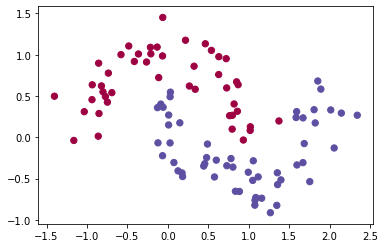

In [50]:
plt.scatter(X_tr[:,0], X_tr[:,1], s=40, c=y_tr, cmap=plt.cm.Spectral)
print(X.shape, y.shape)

num_features = X_tr.shape[-1]
print('Number of features:>>', num_features)

num_output = 2
print('Number of outputs:>>', num_output)

# From Logistic Regression to "Deep Learning"
The code implements logistic regression. In section [__Assignments Half Moon__](#Assignments-Half-Moon) (bottom of this notebook) you are asked to modify the code into a neural network.

The standard building block for neural networks are layers.
The simplest of which is called a `dense feed forward layer`, and it is computed as follows:

$$y = \mathrm{nonlinearity}(xW + b)$$

where $x$ is the input vector, $y$ is the output vector, and $W, b$ are the weights (a matrix and vector respectively).
The *dense* part of the name comes from the fact that every element of $x$ contributes to every element of $y$.
And the *feed forward* part of the name means that the layer processes each input independently. 
If we were to draw the layer it would be acyclical.
Later we will se layers that break both of these conventions.

- $x$ has shape `[batch_size, num_features]`,
- $W$ has shape `[num_features, num_units]`,
- $b$ has `[num_units]`, and
- $y$ has then `[batch_size, num_units]`

## PyTorch 101

In this first exercise we will use basic PyTorch functions so that you can learn how to build it from scratch. This will help you later if you want to build your own custom operations.

In [0]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter # A kind of Tensor that is to be considered a module parameter.
import torch.nn as nn # Base class for all neural network modules.
import torch.nn.functional as F # Functional interface  

[`Parameters`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Parameter) are [`Variable`](http://pytorch.org/docs/0.1.12/autograd.html#torch.autograd.Variable) subclasses, that have a very special property when used with [`Module`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Module)'s - when they’re assigned as `Module` attributes they are automatically added to the list of its parameters, and will appear e.g. in [`.parameters()`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Module.parameters) iterator.
Assigning a Variable doesn’t have such effect.
This is because one might want to cache some temporary state (more on this later) in the model.
If there was no such class as `Parameter`, these temporaries would get registered too.

In [0]:
class Net(nn.Module):
    def __init__(self):  
        
        # inherit attributes and methods from the parent class 
        super(Net, self).__init__()        
        
        # Setting up variables, these variables are weights in your 
        # network that can be updated while running our graph.
        
        # Notice, to make a hidden layer, the weights need to have the         
        # following dimensionality:
        #   W[number_of_units_going_out, number_of_units_going_in]
        #   b[number_of_units_going_out]
        
        # in the example below we have 2 input units (num_features) and 2 output units (num_output)
        # so our weights become W[2, 2], b[2]
        
        # if we want to make a hidden layer with 100 units, we need to define the shape of the
        # first weight to W[100, 2], b[2] and the shape of the second weight to W[2, 100], b[2]
         
        # first layer
        self.W_1 = Parameter(torch.randn(num_output, num_features)) 
        self.b_1 = Parameter(torch.randn(num_output))
                        
        # second layer (to be completed as an exercise)
        # NB when you create a second layer, remember that you also must change parts of the first layer
        # number of features of the pervious layer will be equal to the number of output of the current 
        # layer 
        # self.W_2 = Parameter(torch.randn(num_features, num_output)) 
        # self.b_2 = self.b_1 = Parameter(torch.randn(num_features))
        
       
    def forward(self, x):
        # method of the class 
        
        # Setting up ops, these ops will define edges along our computational graph
        # The below ops will compute a logistic regression, 
        # but can be modified to compute a neural network        
        
        # Applies a linear transformation to the incoming data: :math:`y = xW^T + b` 
        x = F.linear(x, self.W_1, self.b_1)
        
        # second layer (to be completed as an exercise)
        # NB when you create a second layer, remember that you also must change parts of the first layer
        # x = F.linear(x, self.W_2, self.b_2)        
        
        # softmax to be performed on the second dimension
        xSoftmax = F.softmax(x, dim = 1)
        
        return xSoftmax    

In [53]:
net = Net()
print(net)

Net()


Knowing how to print your tensors is useful

In [54]:
# list all parameters in your network
print("NAMED PARAMETERS")
print(list(net.named_parameters()))

NAMED PARAMETERS
[('W_1', Parameter containing:
tensor([[ 2.3034, -1.8216],
        [-0.0953,  1.8687]], requires_grad=True)), ('b_1', Parameter containing:
tensor([ 0.0399, -1.0386], requires_grad=True))]


In [55]:
# the .parameters() method simply gives the Tensors in the list
print("PARAMETERS")
print(list(net.parameters()))
print()

PARAMETERS
[Parameter containing:
tensor([[ 2.3034, -1.8216],
        [-0.0953,  1.8687]], requires_grad=True), Parameter containing:
tensor([ 0.0399, -1.0386], requires_grad=True)]



In [56]:
# list individual parameters by name
print('WEIGHTS')
print(net.W_1)
print(net.W_1.size())

WEIGHTS
Parameter containing:
tensor([[ 2.3034, -1.8216],
        [-0.0953,  1.8687]], requires_grad=True)
torch.Size([2, 2])


In [57]:
print('\nBIAS')
print(net.b_1)
print(net.b_1.size())


BIAS
Parameter containing:
tensor([ 0.0399, -1.0386], requires_grad=True)
torch.Size([2])


# Exploring Parameter

Ok, let's investigate what a `Parameter`/`Variable` is

In [58]:
param = net.W_1
print(param)

Parameter containing:
tensor([[ 2.3034, -1.8216],
        [-0.0953,  1.8687]], requires_grad=True)


In [59]:
print("## this is the tensor")
print(param.data)

print("\n## this is the tensor's gradient")
print(param.grad)
# notice, the gradient is undefined because we have not yet run a backward pass

print("\n## is it a leaf in the graph?")
print(param.is_leaf)

## this is the tensor
tensor([[ 2.3034, -1.8216],
        [-0.0953,  1.8687]])

## this is the tensor's gradient
None

## is it a leaf in the graph?
True


## Excluding subgraphs from backward propagation

`Variable`s have two properties which allow you to define if a graph is going to be used for training or inference, `requires_grad` and `volatile`.
During training we might not want to compute the gradients for all layers, e.g. if we have a pretrained model or embeddings that we do not want to change the values of.

To compute gradients we need to store activations and compute the backward pass for the given layer.
Setting `requires_grad = False` will allow you to circumvent these properties.
If any paramater in an operation / layer requires gradient then the entire output of the operation will also require gradient.

The `volatile` property is mostly used when you want to run inference with your model, and if it is set to `True` the entire graph will not require gradient. This means that you expect to never call `.backward()` on the network.

See http://pytorch.org/docs/master/notes/autograd.html for an in-depth explanation.

# Test network

To use our network we can simply call our graph, and it will dynamically be created. Here is an example of running the network's forward pass.

In [0]:
num_neurons = 5
X = Variable(torch.randn(num_neurons, num_features))

# the net.__call__ runs some pre-defined functions
# both before and after running net.forward()
# see http://pytorch.org/docs/master/_modules/torch/nn/modules/module.html

In [61]:
print('input')
print(X)
print(X.shape)

input
tensor([[-0.9870, -0.2317],
        [-0.8730,  0.3042],
        [ 1.7153, -0.3901],
        [-0.9813,  0.5364],
        [-0.4048,  1.0329]])
torch.Size([5, 2])


In [62]:
print('\noutput')
print(net(X))


output
tensor([[0.3932, 0.6068],
        [0.1055, 0.8945],
        [0.9987, 0.0013],
        [0.0372, 0.9628],
        [0.0240, 0.9760]], grad_fn=<SoftmaxBackward>)


In [63]:
print('\nWEIGHT')

param = net.W_1
print(param)


WEIGHT
Parameter containing:
tensor([[ 2.3034, -1.8216],
        [-0.0953,  1.8687]], requires_grad=True)


In [64]:
print('\nBIAS')
print(net.b_1)


BIAS
Parameter containing:
tensor([ 0.0399, -1.0386], requires_grad=True)


Parameters is a special case of Variable 

In [65]:
# let's take a look at the gradients
for p in net.parameters():
    print('DATA >>>', p.data)
    print('GRADIENT >>>', p.grad)
    print()

DATA >>> tensor([[ 2.3034, -1.8216],
        [-0.0953,  1.8687]])
GRADIENT >>> None

DATA >>> tensor([ 0.0399, -1.0386])
GRADIENT >>> None



In [66]:
X = Variable(torch.randn(7, num_features))
out = net(X)
print(out)

tensor([[0.0349, 0.9651],
        [0.8980, 0.1020],
        [0.9985, 0.0015],
        [0.9925, 0.0075],
        [0.9599, 0.0401],
        [0.3472, 0.6528],
        [0.0140, 0.9860]], grad_fn=<SoftmaxBackward>)


In [0]:
# we need to give a tensor of gradients to .backward,
# we give a dummy tensor
out.backward(torch.randn(7, num_features))

for details on `.backward()`, see http://pytorch.org/docs/master/autograd.html#torch.autograd.backward

In [68]:
# let's take a look at the gradients
for p in net.parameters():
    print('DATA >>>', p.data)
    print('GRADIENT >>>', p.grad)
    print()

DATA >>> tensor([[ 2.3034, -1.8216],
        [-0.0953,  1.8687]])
GRADIENT >>> tensor([[-0.4826, -0.1601],
        [ 0.4826,  0.1601]])

DATA >>> tensor([ 0.0399, -1.0386])
GRADIENT >>> tensor([ 0.0165, -0.0165])



In [69]:
# ok, let's try and zero the accumulated gradients
net.zero_grad()

for p in net.parameters():
    print('DATA >>>', p.data)
    print('GRADIENT >>>', p.grad)
    print()

DATA >>> tensor([[ 2.3034, -1.8216],
        [-0.0953,  1.8687]])
GRADIENT >>> tensor([[0., 0.],
        [0., 0.]])

DATA >>> tensor([ 0.0399, -1.0386])
GRADIENT >>> tensor([0., 0.])



# Loss function

Let's define a custom loss function to compute how good our graph is doing.

In [0]:
def cross_entropy(ys, ts):    
    # computing cross entropy per sample
    cross_entropy = -torch.sum(ts * torch.log(ys), dim=1, keepdim=False)        
    # averaging over samples
    average = torch.mean(cross_entropy)    
    return average

To train our neural network we need to update the parameters in direction of the negative gradient w.r.t the cost function we defined earlier.
We can use [`torch.optim`](http://pytorch.org/docs/master/optim.html) to get the gradients with some update rule for all parameters in the network.

Heres a small animation of gradient descent: http://imgur.com/a/Hqolp, which also illustrates which challenges optimizers might face, e.g. saddle points.

In [0]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

Next, we make the prediction functions, such that we can get an accuracy measure over a batch

In [0]:
def accuracy(ys, ts):    
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = torch.eq(torch.max(ys, 1)[1], torch.max(ts, 1)[1])    
    # averaging the one-hot encoded vector
    return torch.mean(correct_prediction.float())

The next step is to utilize our `optimizer` repeatedly in order to optimize our weights `W_1` and `b_1` to make the best possible linear seperation of the half moon dataset.

In [0]:
# number of training passses
num_epochs = 1000

# store loss and accuracy for information
train_losses, val_losses, train_accs, val_accs = [], [], [], []

In [0]:
def pred(X):
    """ Compute graph's prediction and return numpy array
    
    Parameters
    ----------
    X : numpy.ndarray
    
    Returns
    -------
    numpy.ndarray
    """
    X = Variable(torch.from_numpy(X))
    y = net(X)
    
    return y.data.numpy()

Text(0.5, 1.0, 'Untrained Classifier')

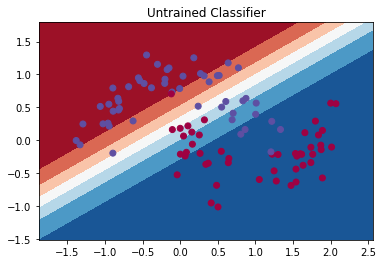

In [75]:
# plot boundary on testset before training session

# lambda arguments: expression 
y = lambda x: pred(x)

# plot_decision_boundary(pred_func, X, y):

plot_decision_boundary(y, X_te, y_te)
plt.title("Untrained Classifier")

In [76]:
for e in range(num_epochs):
    tr_input = Variable(torch.from_numpy(X_tr))
    tr_targets = Variable(torch.from_numpy(onehot(y_tr, num_output))).float()
    optimizer.zero_grad()
    tr_output = net(tr_input)    
    tr_loss = cross_entropy(tr_output, tr_targets)    
    tr_loss.backward()   
    optimizer.step()
    
    train_losses.append(tr_loss.data.numpy())
    val_input = Variable(torch.from_numpy(X_val))
    val_targets = Variable(torch.from_numpy(onehot(y_val, num_output))).float()

    val_output = net(val_input)
    
    val_loss = cross_entropy(val_output, val_targets)

    val_losses.append(val_loss.data.numpy())
    if e % 100 == 0:
        print("Epoch %i", e)
        print("Train Cost", train_losses[-1])
        print("Validation Cost", val_losses[-1])        

Epoch %i 0
Train Cost 3.1364965
Validation Cost 2.9443662
Epoch %i 100
Train Cost 2.1871653
Validation Cost 2.084443
Epoch %i 200
Train Cost 1.4593245
Validation Cost 1.4259024
Epoch %i 300
Train Cost 1.0254993
Validation Cost 1.0285963
Epoch %i 400
Train Cost 0.7915977
Validation Cost 0.8080342
Epoch %i 500
Train Cost 0.6598706
Validation Cost 0.6795213
Epoch %i 600
Train Cost 0.57962376
Validation Cost 0.5990797
Epoch %i 700
Train Cost 0.5269239
Validation Cost 0.5453143
Epoch %i 800
Train Cost 0.49001527
Validation Cost 0.5073231
Epoch %i 900
Train Cost 0.462766
Validation Cost 0.4792211


In [0]:
te_input = Variable(torch.from_numpy(X_te))
te_targets = Variable(torch.from_numpy(onehot(y_te, num_output))).float()

In [0]:
te_output = net(te_input)

In [79]:
te_loss = cross_entropy(te_output, te_targets)
print("\nTest Cost:", te_loss.data.numpy())


Test Cost: 0.42000043


Text(0.5, 1.0, 'Trained Classifier')

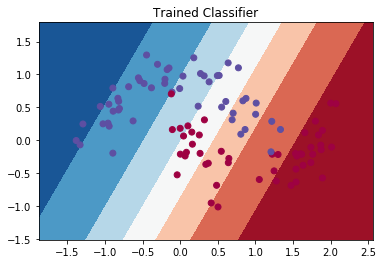

In [80]:
plot_decision_boundary(lambda x: pred(x), X_te, y_te)
plt.title("Trained Classifier")

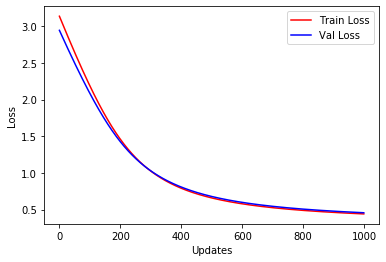

In [81]:
plt.figure()
epoch = np.arange(len(train_losses))

plt.plot(epoch, train_losses, 'r', label='Train Loss')
plt.plot(epoch[:1000:], val_losses, 'b', label='Val Loss')
plt.legend()
plt.xlabel('Updates')
plt.ylabel('Loss')
plt.show()

# Assignments

1. A linear logistic classifier is only able to create a linear decision boundary. Change the Logistic classifier into a (nonlinear) Neural network by inserting a dense hidden layer between the input and output layers of the model
 
2. Experiment with multiple hidden layers or more / less hidden units. What happens to the decision boundary?
 
3. Overfitting: When increasing the number of hidden layers / units the neural network will fit the training data better by creating a highly nonlinear decision boundary. If the model is to complex it will often generalize poorly to new data (validation and test set). Can you observe this from the training and validation errors? 
 
4. We used the vanilla stocastic gradient descent algorithm for parameter updates. This is usually slow to converge and more sophisticated pseudo-second-order methods usually works better. Try changing the optimizer to [adam or momentum](http://pytorch.org/docs/master/optim.html#torch.optim.Adam)

In [82]:
class Net(nn.Module):
    def __init__(self):  
        
        super(Net, self).__init__()   

        self.W_1 = Parameter(torch.randn(num_output, num_features)) 
        self.b_1 = Parameter(torch.randn(num_output))

        self.W_2 = Parameter(torch.randn(num_features, num_output)) 
        self.b_2 = self.b_1 = Parameter(torch.randn(num_features))
        
       
    def forward(self, x):      
        
        # linear transformation to the incoming data: :math:`y = xW^T + b` 
        x = F.linear(x, self.W_1, self.b_1)
        
        # second layer 
        x = F.linear(x, self.W_2, self.b_2)      
        
        # softmax performed on the second dimension
        xSoftmax = F.softmax(x, dim = 1)
        
        return xSoftmax

net = Net()
print(net)

Net()


In [0]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.01)

Text(0.5, 1.0, 'Untrained Classifier')

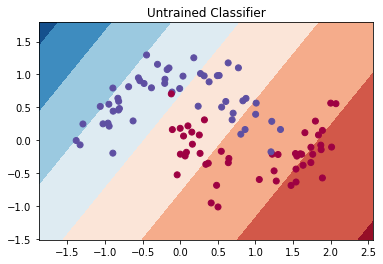

In [84]:
num_epochs = 1000
train_losses, val_losses, train_accs, val_accs = [], [], [], []
y = lambda x: pred(x)
plot_decision_boundary(y, X_te, y_te)
plt.title("Untrained Classifier")

In [85]:
# training loop
for e in range(num_epochs):
    tr_input = Variable(torch.from_numpy(X_tr))
    tr_targets = Variable(torch.from_numpy(onehot(y_tr, num_output))).float()
    optimizer.zero_grad()
  
    tr_output = net(tr_input)    

    tr_loss = cross_entropy(tr_output, tr_targets)    
    tr_loss.backward()   
    optimizer.step()
    train_losses.append(tr_loss.data.numpy())
    val_input = Variable(torch.from_numpy(X_val))
    val_targets = Variable(torch.from_numpy(onehot(y_val, num_output))).float()
    
    # predict with validation input
    val_output = net(val_input)
    
    # compute loss 
    val_loss = cross_entropy(val_output, val_targets)
    
    # store loss
    val_losses.append(val_loss.data.numpy())
        
    if e % 100 == 0:
        print("Epoch %i", e)
        print("Train Cost", train_losses[-1])
        print("Validation Cost", val_losses[-1])

Epoch %i 0
Train Cost 1.1493713
Validation Cost 1.2698135
Epoch %i 100
Train Cost 0.3219733
Validation Cost 0.33819354
Epoch %i 200
Train Cost 0.3022701
Validation Cost 0.33308536
Epoch %i 300
Train Cost 0.30222774
Validation Cost 0.33370212
Epoch %i 400
Train Cost 0.30222777
Validation Cost 0.333701
Epoch %i 500
Train Cost 0.3022278
Validation Cost 0.333701
Epoch %i 600
Train Cost 0.3022278
Validation Cost 0.333701
Epoch %i 700
Train Cost 0.3022278
Validation Cost 0.333701
Epoch %i 800
Train Cost 0.3022278
Validation Cost 0.333701
Epoch %i 900
Train Cost 0.30222774
Validation Cost 0.333701


In [86]:
te_input = Variable(torch.from_numpy(X_te))
te_targets = Variable(torch.from_numpy(onehot(y_te, num_output))).float()

# predict on testset
te_output = net(te_input)

# compute loss and accuracy, and calculate cost
te_loss = cross_entropy(te_output, te_targets)
print("\nTest Cost:", te_loss.data.numpy())


Test Cost: 0.27013606


Text(0.5, 1.0, 'Trained Classifier')

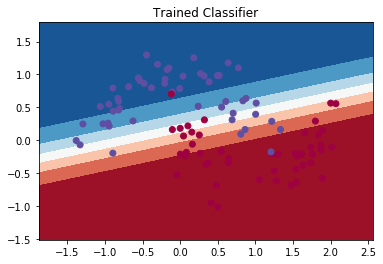

In [87]:
plot_decision_boundary(lambda x: pred(x), X_te, y_te)
plt.title("Trained Classifier")

When you're done, continue to the next part of this lab.

# Credits
> This code is a slight modification to a translation (TensorFlow --> PyTorch) of a previous version of the [02456](http://kurser.dtu.dk/course/02456) course material. 
> [Original repo link (TensorFlow)](https://github.com/DeepLearningDTU/02456-deep-learning).
> [Translated repo link (PyTorch)](https://github.com/munkai/pytorch-tutorial/tree/master/2_intermediate).

In [88]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=d0a8fd34cd1d030ddb0da7406929d5c567e8c3e5512c1d598a9b3befda9a14d6
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


# MNIST dataset
MNIST is a dataset that is often used for benchmarking. The MNIST dataset consists of 70,000 images of handwritten digits from 0-9. The dataset is split into a 50,000 images training set, 10,000 images validation set and 10,000 images test set. The images are 28x28 pixels, where each pixel represents a normalised value between 0-255 `(0=black and 255=white)`.

![MNIST.Exampel](../static_files/mnist.png)


## Primer
We use a feedforward neural network to classify the 28x28 mnist images. `num_features` is therefore $28 * 28=784$, i.e. we represent each image as a vector. The ordering of the pixels in the vector does not matter, so we could permutate all images using the same permutation and still get the same performance. (You are of course encouraged to try this using ``numpy.random.permutation`` to get a random permutation. This task is therefore called the _permutation invariant_ MNIST. Obviously this throws away a lot of structure in the data. In the next module we'll fix this with the convolutional neural network wich encodes prior knowledgde about data that has either spatial or temporal structure.  

## MNIST
First let's load the MNIST dataset and plot a few examples:

In [0]:
import wget

In [90]:
wget.download('https://github.com/maximai/placeholder_repo/raw/master/mnist.npz')

'mnist.npz'

In [0]:
#To speed up training we'll only work on a subset of the data
data = np.load('mnist.npz')
num_classes = 10

In [92]:
x_train = data['X_train'][:1000].astype('float32')
targets_train = data['y_train'][:1000].astype('int32')

x_valid = data['X_valid'][:500].astype('float32')
targets_valid = data['y_valid'][:500].astype('int32')

x_test = data['X_test'][:500].astype('float32')
targets_test = data['y_test'][:500].astype('int32')

print("Information on dataset")
print("x_train", x_train.shape)

print("targets_train", targets_train.shape)
print("x_valid", x_valid.shape)

print("targets_valid", targets_valid.shape)
print("x_test", x_test.shape)

print("targets_test", targets_test.shape)

Information on dataset
x_train (1000, 784)
targets_train (1000,)
x_valid (500, 784)
targets_valid (500,)
x_test (500, 784)
targets_test (500,)


In [93]:
data

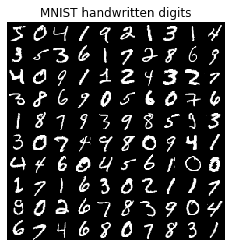

In [94]:
#plot a few MNIST examples
idx, dim, classes = 0, 28, 10
# create empty canvas
canvas = np.zeros((dim*classes, classes*dim))

# fill with tensors
for i in range(classes):
    for j in range(classes):
        canvas[i*dim:(i+1)*dim, j*dim:(j+1)*dim] = x_train[idx].reshape((dim, dim))
        idx += 1

# visualize matrix of tensors as gray scale image
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

## Model

One of the large challenges in deep learning is the amount of hyperparameters that needs to be selected, and the lack of a good principled way of selecting them.
Hyperparameters can be found by experience (guessing) or some search procedure (often quite slow).
Random search is easy to implement and performs decent: http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf . 
More advanced search procedures include [Spearmint](https://github.com/JasperSnoek/spearmint) and many others.

**In practice a lot of trial and error is almost always involved.** This can be frustrating and time consuming, but the best thing to do is to think as a scientist, and go about it in a ordered manner --> monitor as much as you can, take notes, and be deliberate!

Below are some guidelines that you can use as a starting point to some of the most important hyperparameters. 
(*regularization* is also very important, but will be covered later.)


### Ballpark estimates of hyperparameters
__Number of hidden units and network structure:__
You'll have to experiment. One rarely goes below 512 units for feedforward networks (unless your are training on CPU...).
There's some research into stochastic depth networks: https://arxiv.org/pdf/1603.09382v2.pdf, but in general this is trial and error.

__Parameter initialization:__
Parameter initialization is extremely important.
PyTorch has a lot of different initializers, check the [PyTorch API](http://pytorch.org/docs/master/nn.html#torch-nn-init). Often used initializer are
1. Kaming He
2. Xavier Glorot
3. Uniform or Normal with small scale (0.1 - 0.01)
4. Orthogonal (this usually works very well for RNNs)

Bias is nearly always initialized to zero using the [torch.nn.init.constant(tensor, val)](http://pytorch.org/docs/master/nn.html#torch.nn.init.constant)

__Mini-batch size:__
Usually people use 16-256. Bigger is not allways better. With smaller mini-batch size you get more updates and your model might converge faster. Also small batch sizes use less memory, which means you can train a model with more parameters.

__Nonlinearity:__ [The most commonly used nonliearities are](http://pytorch.org/docs/master/nn.html#non-linear-activations)
1. ReLU
2. Leaky ReLU
3. Elu - Exponential linear unit
3. Sigmoid squash the output [0, 1], and are used if your output is binary (not used in the hidden layers)
4. Tanh is similar to sigmoid, but squashes in [-1, 1]. It is rarely used any more.
4. Softmax normalizes the the output to 1, and is used as output if you have a classification problem

See the plot below.

__Optimizer and learning rate:__
1. SGD + Momentum: learning rate 1.0 - 0.1 
2. ADAM: learning rate 3*1e-4 - 1e-5
3. RMSPROP: somewhere between SGD and ADAM


softmax should sum to one (approxiamtely): 1.0


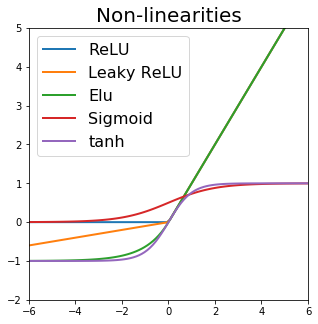

In [95]:
# Illustrate different output units
x = np.linspace(-6, 6, 100)
units = {
    "ReLU": lambda x: np.maximum(0, x),
    "Leaky ReLU": lambda x: np.maximum(0, x) + 0.1 * np.minimum(0, x),
    "Elu": lambda x: (x > 0) * x + (1 - (x > 0)) * (np.exp(x) - 1),
    "Sigmoid": lambda x: (1 + np.exp(-x))**(-1),
    "tanh": lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
}

plt.figure(figsize=(5, 5))
[plt.plot(x, unit(x), label=unit_name, lw=2) for unit_name, unit in units.items()]
plt.legend(loc=2, fontsize=16)
plt.title('Non-linearities', fontsize=20)
plt.ylim([-2, 5])
plt.xlim([-6, 6])

# assert that all class probablities sum to one
softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
print("softmax should sum to one (approxiamtely):", np.sum(softmax(x)))

In [0]:
#Hyperparameters
num_classes = 10
num_l1 = 512
num_features = x_train.shape[1]

# define network
class Net(nn.Module):

    def __init__(self, num_features, num_hidden, num_output):
        super(Net, self).__init__()  
        # input layer
        self.W_1 = Parameter(init.xavier_normal_(torch.Tensor(num_hidden, num_features)))
        self.b_1 = Parameter(init.constant_(torch.Tensor(num_hidden), 0))
        
        # hidden layer
        self.W_2 = Parameter(init.xavier_normal_(torch.Tensor(num_output, num_hidden)))
        self.b_2 = Parameter(init.constant_(torch.Tensor(num_output), 0))
        
        # define activation function in constructor
        self.activation = torch.nn.ELU()

    def forward(self, x):
        x = F.linear(x, self.W_1, self.b_1)
        
        x = self.activation(x)
        
        x = F.linear(x, self.W_2, self.b_2)
        
        return F.softmax(x, dim=1)


net = Net(num_features, num_l1, num_classes)

In [0]:
optimizer = optim.SGD(net.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

In [98]:
#Test the forward pass with dummy data
x = np.random.normal(0, 1, (45, dim*dim)).astype('float32')

print(net(Variable(torch.from_numpy(x))).size())

torch.Size([45, 10])


# Build the training loop

We train the network by calculating the gradient w.r.t the cost function and update the parameters in direction of the negative gradient. 


When training neural network you always use mini batches. Instead of calculating the average gradient using the entire dataset you approximate the gradient using a mini-batch of typically 16 to 256 samples. The paramters are updated after each mini batch. Networks converge much faster using mini batches because the parameters are updated more often.

We build a loop that iterates over the training data. Remember that the parameters are updated each time ``optimizer.step()`` is called.

In [0]:
# we could have done this ourselves,
# but we should be aware of sklearn and it's tools
from sklearn.metrics import accuracy_score

# setting hyperparameters and gettings epoch sizes
batch_size = 100
num_epochs = 100
num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

# setting up lists for handling loss/accuracy
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
losses = []

get_slice = lambda i, size: range(i * size, (i + 1) * size)

In [100]:
for epoch in range(num_epochs):
    # Forward -> Backprob -> Update params
    
    ## Train
    cur_loss = 0
    net.train()
    
    for i in range(num_batches_train):
        
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_train[slce]))
        
        # Forward PASS
        output = net(x_batch)
        
        # compute gradients given loss
        target_batch = Variable(torch.from_numpy(targets_train[slce]).long())
        
        # calculat the loss
        batch_loss = criterion(output, target_batch)
        
        optimizer.zero_grad()        
        
        # backpropogation 
        batch_loss.backward()
        
        # weight update 
        optimizer.step()
        
        cur_loss += batch_loss   
        
    losses.append(cur_loss / batch_size)
    # Sets the module in evaluation mode.
    net.eval()
    
    ### Evaluate training ERROR 
    train_preds, train_targs = [], []
    
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_train[slce]))
        
        output = net(x_batch)
        preds = torch.max(output, 1)[1]
        
        train_targs += list(targets_train[slce])
        train_preds += list(preds.data.numpy())
    
    ### Evaluate validation ERROR
    val_preds, val_targs = [], []
    
    for i in range(num_batches_valid):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_valid[slce]))
        
        output = net(x_batch)
        preds = torch.max(output, 1)[1]
        val_preds += list(preds.data.numpy())
        val_targs += list(targets_valid[slce])

    train_acc_cur = accuracy_score(train_targs, train_preds)
    valid_acc_cur = accuracy_score(val_targs, val_preds)
    
    train_acc.append(train_acc_cur)
    valid_acc.append(valid_acc_cur)
    
    if epoch % 10 == 0:
        print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                epoch+1, losses[-1], train_acc_cur, valid_acc_cur))

Epoch  1 : Train Loss 0.228503 , Train acc 0.218000, Valid acc 0.226000
Epoch 11 : Train Loss 0.184083 , Train acc 0.700000, Valid acc 0.652000
Epoch 21 : Train Loss 0.168598 , Train acc 0.861000, Valid acc 0.770000
Epoch 31 : Train Loss 0.163400 , Train acc 0.888000, Valid acc 0.794000
Epoch 41 : Train Loss 0.160487 , Train acc 0.908000, Valid acc 0.818000
Epoch 51 : Train Loss 0.158440 , Train acc 0.924000, Valid acc 0.822000
Epoch 61 : Train Loss 0.156962 , Train acc 0.933000, Valid acc 0.828000
Epoch 71 : Train Loss 0.155852 , Train acc 0.938000, Valid acc 0.826000
Epoch 81 : Train Loss 0.154940 , Train acc 0.948000, Valid acc 0.830000
Epoch 91 : Train Loss 0.154158 , Train acc 0.952000, Valid acc 0.834000


(Text(0.5, 0, 'Updates'), Text(0, 0.5, 'Acc'))

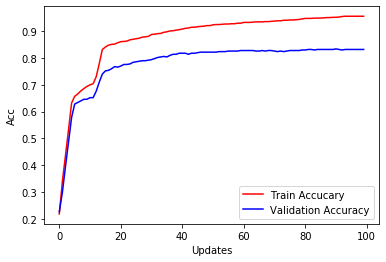

In [101]:
epoch = np.arange(len(train_acc))
plt.figure()
plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
plt.legend(['Train Accucary','Validation Accuracy'])
plt.xlabel('Updates'), plt.ylabel('Acc')

# Assignments

Try and add these modifications (might require some Googleing -- an important skill in deep learning):
- Kaiming He initialization instead of Xavier Glorot
- add an extra layer
- use the relu activation function
- add momentum to the optimizer
- use the ADAM optimizer instead of stochastic gradient descent

### Advanced - Regularization

Regularization is VERY important in practice and is used practically every time.
Many important results are completely dependent on cleaver use of regularization, and it is something you need to become familiar with if you want to work with deep learning.

- add L1 or L2 weight regularization (aka. weight decay) 
- add dropout to the network (**note** the `net.train()` and `net.eval()` are already in the code)
- add batchnorm

__Pointers on regularization hyperparameter:__
1. L2 and [L1 regularization](http://pytorch.org/docs/master/nn.html#torch.nn.L1Loss) (weight decay of optimization functions) 
  - Normal ranges: 1e-4  -  1e-8
1. [Dropout](http://pytorch.org/docs/master/nn.html?highlight=dropout#torch.nn.Dropout). Dropout rate 0.1-0.5
  - Remember to pick the correct version according to the input dimensionality
  - **NOTE** call `net.train()` before training to activate random dropout, and call `net.eval()` to deactivate dropout while validating or running inference with model.
1. [Batchnorm](http://pytorch.org/docs/master/nn.html#torch.nn.BatchNorm1d): Batchnorm also acts as a regularizer - Often very useful (faster and better convergence)
  - Remember to pick the correct version according to the input dimensionality
  - **NOTE** call `net.train()` before training to activate, and call `net.eval()` to have a non-stochastic variant while validating or running inference with model.
    

In [0]:
num_classes = 10
num_l1 = num_l2 = 512
num_features = x_train.shape[1]

# define network
class Net(nn.Module):

    def __init__(self, num_features, num_hidden1, num_hidden2, num_output):
        super(Net, self).__init__()  
        # input layer
        self.W_1 = Parameter(init.kaiming_normal_(torch.Tensor(num_hidden1, num_features)))
        self.b_1 = Parameter(init.constant_(torch.Tensor(num_hidden1), 0))
        self.batchnorm1 = nn.BatchNorm1d(num_hidden1)
        
        # hidden layers
        self.W_2 = Parameter(init.kaiming_normal_(torch.Tensor(num_hidden2, num_hidden1)))
        self.b_2 = Parameter(init.constant_(torch.Tensor(num_hidden2), 0))
        self.batchnorm2 = nn.BatchNorm1d(num_hidden2)
        self.W_3 = Parameter(init.kaiming_normal_(torch.Tensor(num_output, num_hidden2)))
        self.b_3 = Parameter(init.constant_(torch.Tensor(num_output), 0))
        self.dropout = torch.nn.Dropout() # default = 0.5
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = F.linear(x, self.W_1, self.b_1)     
        x = self.batchnorm1(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = F.linear(x, self.W_2, self.b_2)
        x = self.batchnorm2(x)
        x = self.activation(x)
        x = self.dropout(x)
        
        x = F.linear(x, self.W_3, self.b_3)
        
        return F.softmax(x, dim=1)

In [0]:
net = Net(num_features, num_l1, num_l2, num_classes)
optimizer = optim.Adam(net.parameters(), lr=1e-3, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

In [0]:
from sklearn.metrics import accuracy_score

batch_size = 100
num_epochs = 100
num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
losses = []

get_slice = lambda i, size: range(i * size, (i + 1) * size)

In [105]:
for epoch in range(num_epochs):
   
    cur_loss = 0
    net.train()
    
    for i in range(num_batches_train):
        
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_train[slce]))
        
        output = net(x_batch)

        target_batch = Variable(torch.from_numpy(targets_train[slce]).long())

        batch_loss = criterion(output, target_batch)
        optimizer.zero_grad()        
        batch_loss.backward()
        optimizer.step()
        
        cur_loss += batch_loss   
        
    losses.append(cur_loss / batch_size)
    # Sets the module in evaluation mode.
    net.eval()

    train_preds, train_targs = [], []
    
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_train[slce]))
        
        output = net(x_batch)
        preds = torch.max(output, 1)[1]
        
        train_targs += list(targets_train[slce])
        train_preds += list(preds.data.numpy())
        
    val_preds, val_targs = [], []
    
    for i in range(num_batches_valid):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_valid[slce]))
        
        output = net(x_batch)
        preds = torch.max(output, 1)[1]
        val_preds += list(preds.data.numpy())
        val_targs += list(targets_valid[slce])

    train_acc_cur = accuracy_score(train_targs, train_preds)
    valid_acc_cur = accuracy_score(val_targs, val_preds)
    
    train_acc.append(train_acc_cur)
    valid_acc.append(valid_acc_cur)
    
    if epoch % 20 == 0:
        print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                epoch+1, losses[-1], train_acc_cur, valid_acc_cur))

Epoch  1 : Train Loss 0.215379 , Train acc 0.706000, Valid acc 0.602000
Epoch 21 : Train Loss 0.148758 , Train acc 0.987000, Valid acc 0.862000
Epoch 41 : Train Loss 0.147460 , Train acc 0.990000, Valid acc 0.862000
Epoch 61 : Train Loss 0.147242 , Train acc 0.991000, Valid acc 0.866000
Epoch 81 : Train Loss 0.147117 , Train acc 0.992000, Valid acc 0.866000


(Text(0.5, 0, 'Updates'), Text(0, 0.5, 'Acc'))

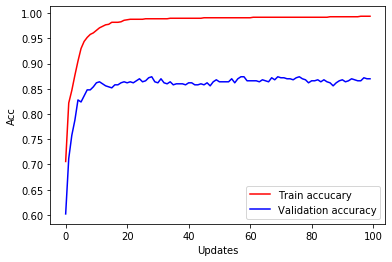

In [106]:
epoch = np.arange(len(train_acc))
plt.figure()
plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
plt.legend(['Train accucary','Validation accuracy'])
plt.xlabel('Updates'), plt.ylabel('Acc')

You are done for now. [Good job.](https://media1.tenor.com/images/0fd559b07f2174f9b8b7dbde7c5a67ca/tenor.gif)